## Machine Learning Supervisado Boston Houses Prices

## Preparación de un conjunto de datos de ejemplo
Se va a utilizar un conjunto de datos de ejemplo que viene dentro de la libreria scikit learn.

Posteriormente los resultados se van a separar en un conjunto de entrenamiento y test con el método ` train_test_split`.

In [2]:
# importación de librerias necesarias:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt

## Otros
import warnings

%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## El primer paso será realizar la importación de los datos:

In [3]:
boston = load_boston()
# ¿que campos contiene el dataset?
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# descripción de los datos exportados
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

En este caso, queremos predecir el precio de la vivienda, por lo que los datos de la variable "MEDV" (Median value of owner-occupied homes in $1000's) será nuestra variable objetivo.

Para determinar la cantidad de datos de nuestra variable objetivo 

In [6]:
boston['target'].shape

(506,)

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Exportamos los datos:

In [8]:
ruta = "boston_dataset.csv"

In [9]:
df = pd.DataFrame (data=boston['data'], columns=boston['feature_names'])

# queremos trabajar con aprendizaje supervisado, por lo que tenemos que agregar el target:
df['MEDV']=boston.target


df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [10]:
# Por facilitar la interpretación movemos la variable objetivo al frente

y=df.MEDV.copy()
del df['MEDV']
df = pd.concat((y, df), axis=1)
df.head()

MEDV     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  34.7  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  33.4  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  36.2  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

## Limpieza de los datos
Lo primero que haremos es revisar los tipos de datos que tenemos

In [11]:
df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

Todos los campos son de tipo float (probablemente variables continuas), incluyendo la variable objetivo. Esto indica que nos encontrammos frente a un problema de regresión.

Lo primero que haremos es identificar si tenemos algún valor nulo


In [12]:
#sumamos los valores nulos
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Eliminar características con baja varianza
El primer paso puede ser eliminar las características que no varían una cantidad suficiente. Para esto se puede utilizar el constructor ` VarianceThreshold` al que se le ha de indicar la varianza mínima que ha de tener una característica.

In [13]:
var_th = VarianceThreshold(threshold = 0.25)
x_var = var_th.fit_transform(boston.data)

print(u"Número de características originales", boston.data.shape[1])
print(u"Número de características finales", x_var.shape[1])
print(u"\nListado de características originales", boston['feature_names'])
print(u"Listado de características finales", boston['feature_names'][var_th.get_support()])

Número de características originales 13
Número de características finales 11

Listado de características originales ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Listado de características finales ['CRIM' 'ZN' 'INDUS' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


Una vez realizado el ajuste con el método ` fit_transform` se puede utilizar el método `transform` para transformar nuevos conjuntos de datos y el método `get_support` para obtener un vector con los valores de las columnas que pasan el corte.

### Selección univariante de las mejores características

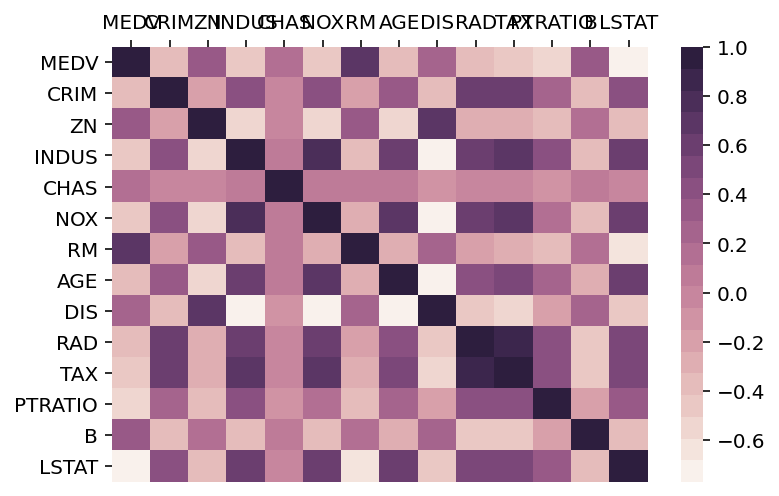

In [14]:
# Correlación de datos mediante el método heatmap

ax = sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(20, light=0.95,dark=0.15))
ax.xaxis.tick_top() # movemos las etiquetas a la parte superior



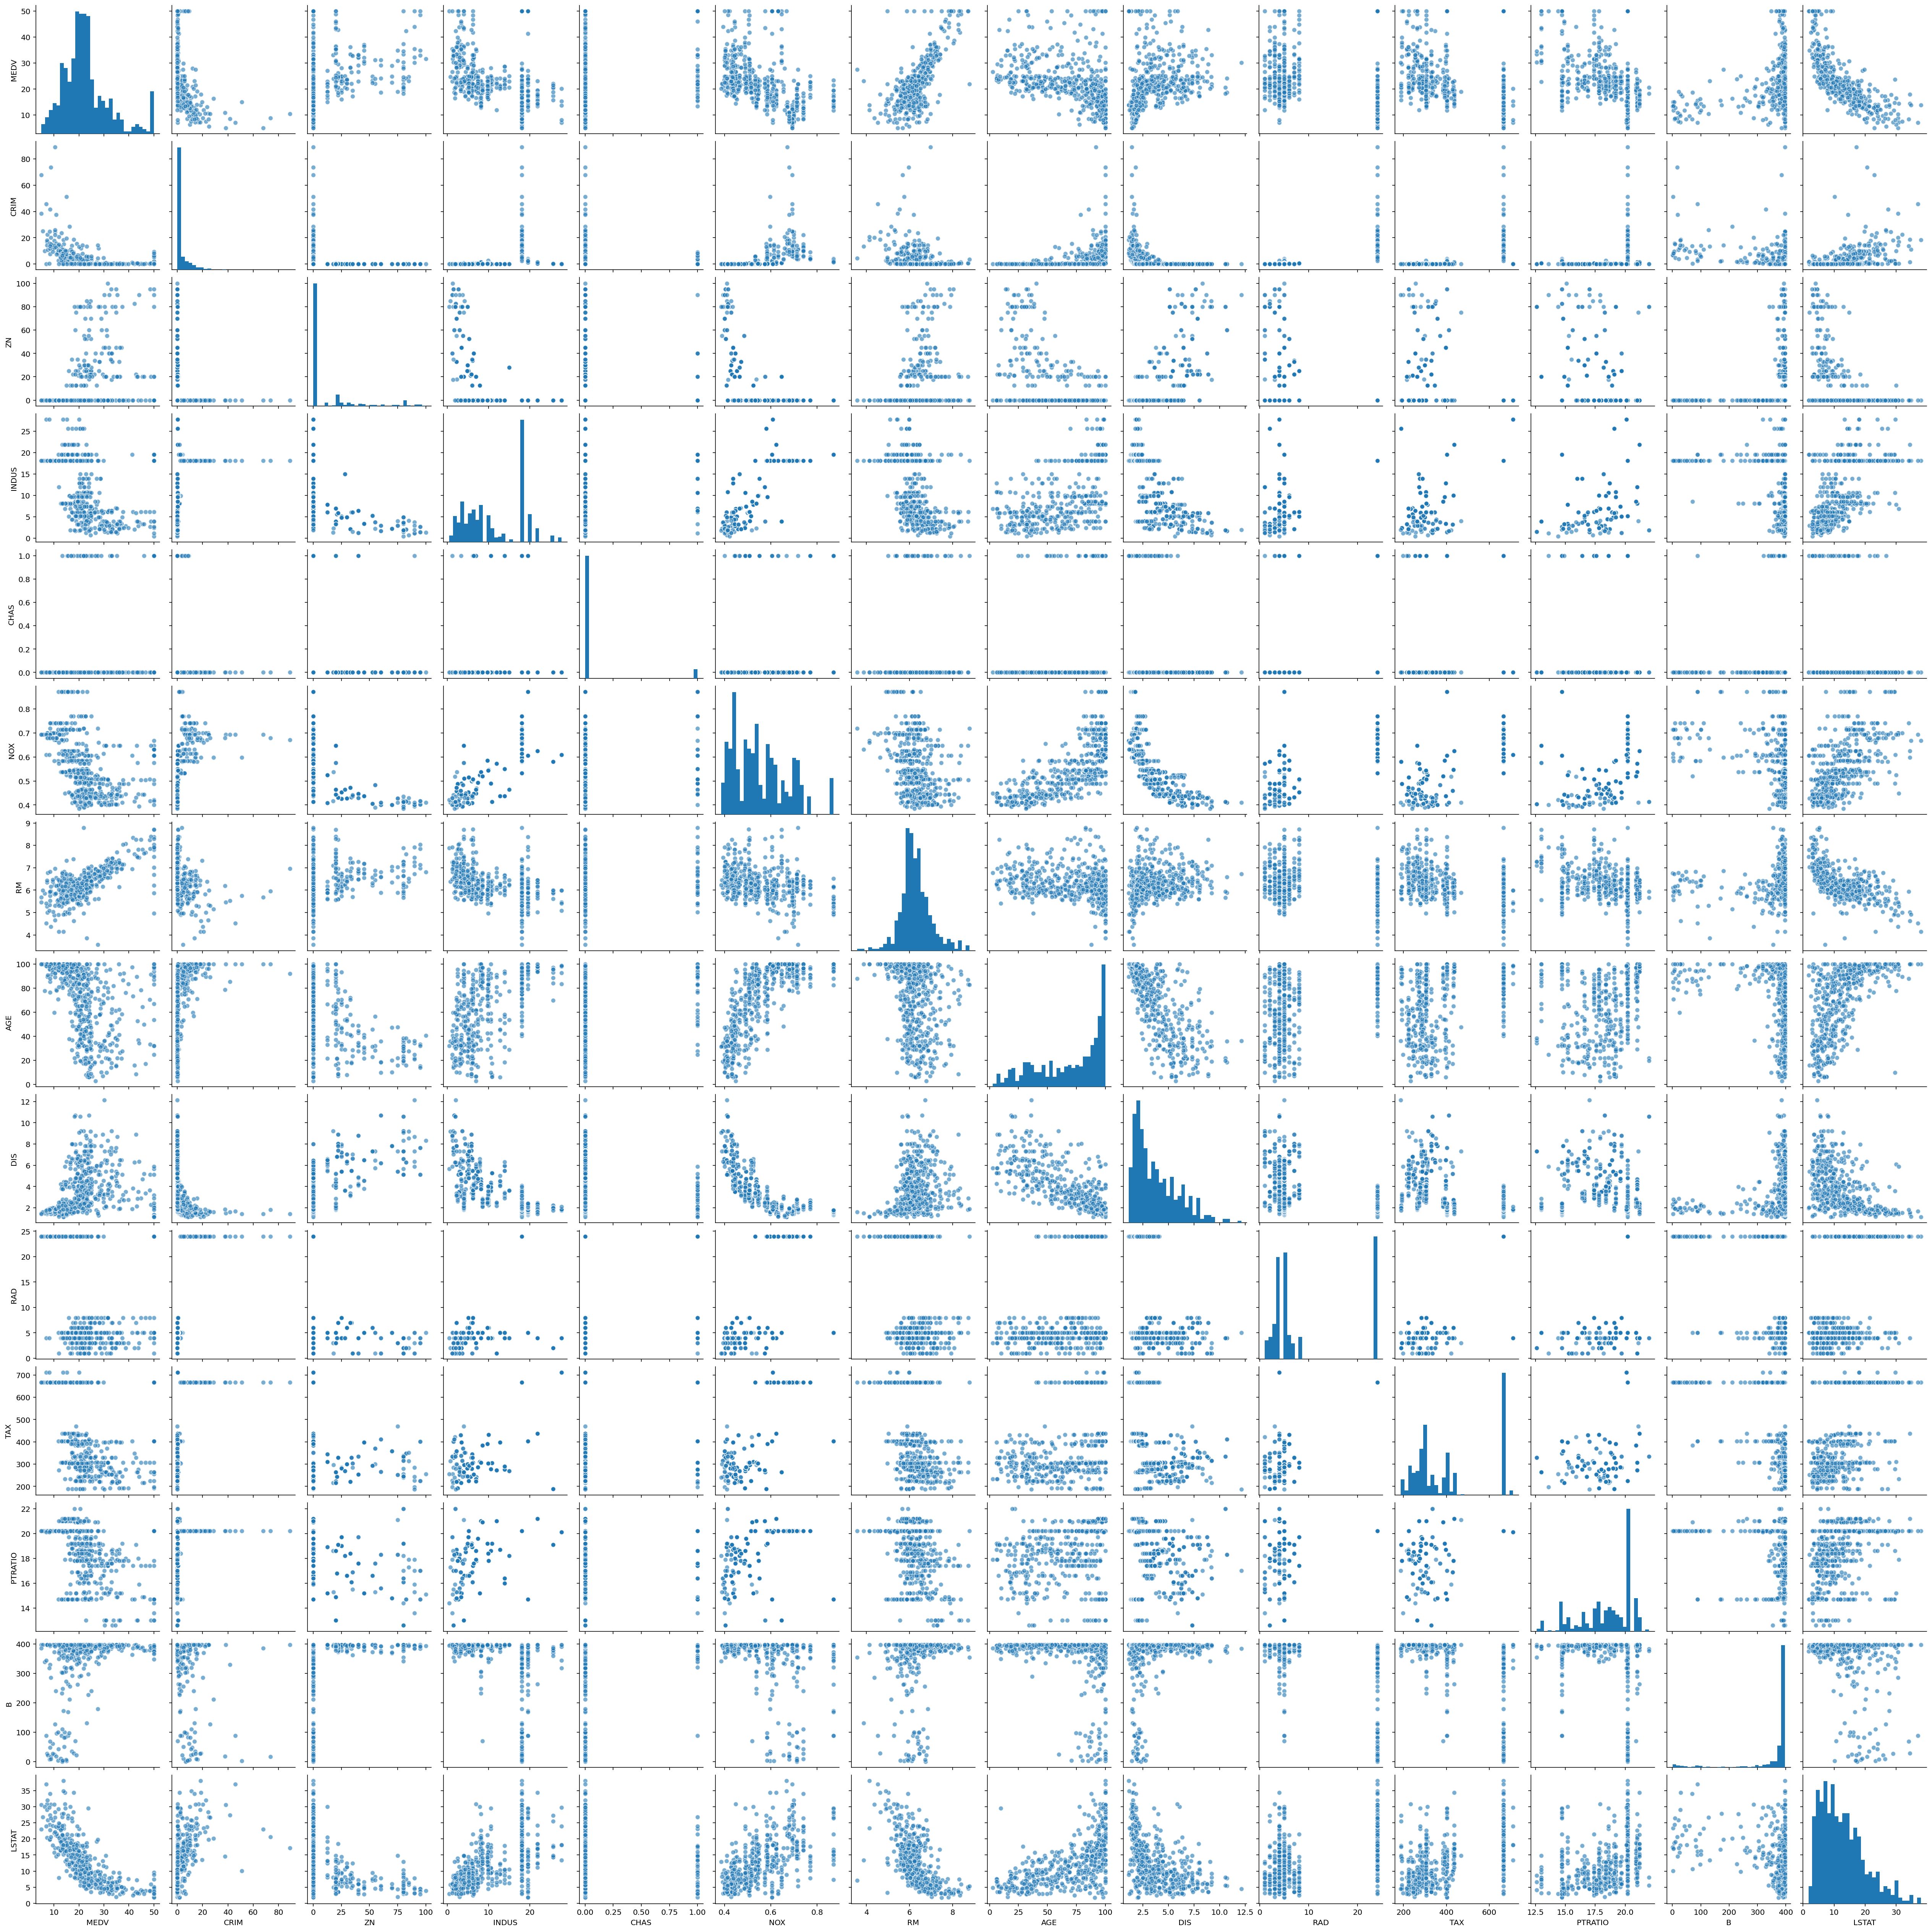

In [15]:
sns.pairplot(df,plot_kws={'alpha':0.6},diag_kws={'bins':30})

Se puede observar que :

— RM y MEDV presentan una distribución normal.

— AGE esta distribuida hacia la izquierda y LSTAT hacia la derecha (a mayor edad, mayor status).

—TAX tiene una gran cantidad de puntos en el valor 700, hay un salto en los valores (de 500 a 600)

Antes de crear un modelo se puede utilizar los constructores `SelectKBest` o `SelectPercentile` para seleccionar crear objetos que permitan seleccionar las `k` mejores características o un porcentaje de las mismas respectivamente para la creación de un modelo. En ambos casos se ha de ha de indicar el criterio a utilizar para ordenarlas. En *scikit-learn* existen dos métodos que se pueden utilizar según el tipo de problema con el que se esté trabajando:

* `f_regression` para modelos de regressión
* `chi2` para modelos de clasificación (no aplica en este ejercicio)

Se pueden seleccionar las 6 mejores características del conjunto de datos del precio de la vivienda en Boston para un modelo de regresión.`

In [16]:

var_sk = SelectKBest(f_regression, k = 6)
x_sk = var_sk.fit_transform(boston.data, boston.target)

print(u"Número de características finales", x_sk.shape[1])
print(u"Listado de características finales", boston['feature_names'][var_sk.get_support()])

Número de características finales 6
Listado de características finales ['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT']


Se puede observar que se han seleccionado 6 características como se ha indicado. En el caso de `SelectPercentile` se le ha de indicar el porcentaje de características a seleccionar del conjunto de datos. Por ejemplo, se puede probar seleccionando el 50% las mejores.

In [17]:

var_pc = SelectPercentile(f_regression, percentile = 50)
x_pc = var_pc.fit_transform(boston.data, boston.target)

print(u"Número de características finales", x_pc.shape[1])
print(u"Listado de características finales", boston['feature_names'][var_pc.get_support()])

Número de características finales 6
Listado de características finales ['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT']


En este caso se han obtenido 6 características.

Nos quedaremos con las variables que nos indica el método select percentile. El siguiente paso es eliminar las variables que no nos interesan:

In [18]:
for col in ['CRIM' , 'ZN' , 'CHAS' , 'AGE' , 'DIS' , 'RAD' , 'B' ]:
    del df[col]


In [19]:
df.describe().T

count        mean         std      min       25%       50%       75%  \
MEDV     506.0   22.532806    9.197104    5.000   17.0250   21.2000   25.0000   
INDUS    506.0   11.136779    6.860353    0.460    5.1900    9.6900   18.1000   
NOX      506.0    0.554695    0.115878    0.385    0.4490    0.5380    0.6240   
RM       506.0    6.284634    0.702617    3.561    5.8855    6.2085    6.6235   
TAX      506.0  408.237154  168.537116  187.000  279.0000  330.0000  666.0000   
PTRATIO  506.0   18.455534    2.164946   12.600   17.4000   19.0500   20.2000   
LSTAT    506.0   12.653063    7.141062    1.730    6.9500   11.3600   16.9550   

             max  
MEDV      50.000  
INDUS     27.740  
NOX        0.871  
RM         8.780  
TAX      711.000  
PTRATIO   22.000  
LSTAT     37.970

## Análisis predictivo

Para la predicción de variables, lo primero que haremos es crear un modelo y entrenarlo. Debido a que se trata de un problema de regresión, crearemos primero una regresión lineal y luego un arbol de desición para saber cual es el mejor modelo.

Utilizaremos los parametros RM y LSTAT para comparar con nuestro objetivo, ya que estas variables están altamente correlacionadas. Creamos un mapa de puntos con un modelo lineal:

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

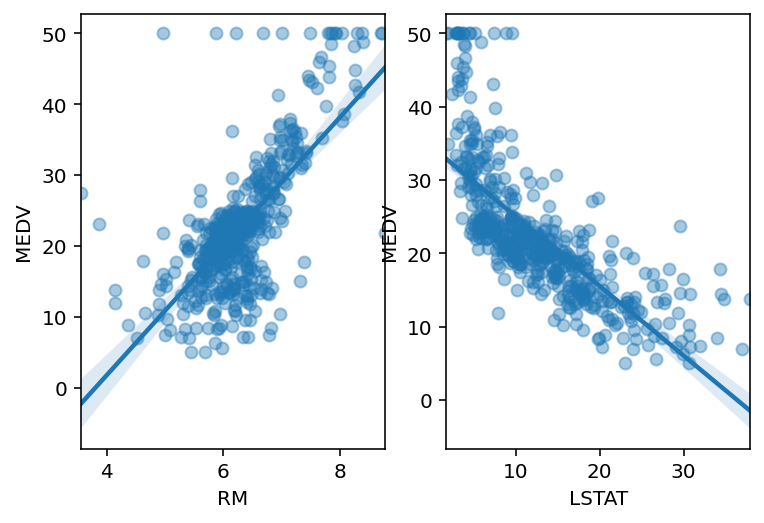

In [20]:
# Modelado de MEDV en función de RM y LSTAT
fig, ax = plt.subplots(1,2)
sns.regplot('RM','MEDV',df, ax=ax[0], scatter_kws={'alpha':0.4})
sns.regplot('LSTAT', 'MEDV',df, ax=ax[1], scatter_kws={'alpha':0.4})

La linea que se obtiene con la funcion de mínimos cuadrados. 

Text(0, 0.5, '')

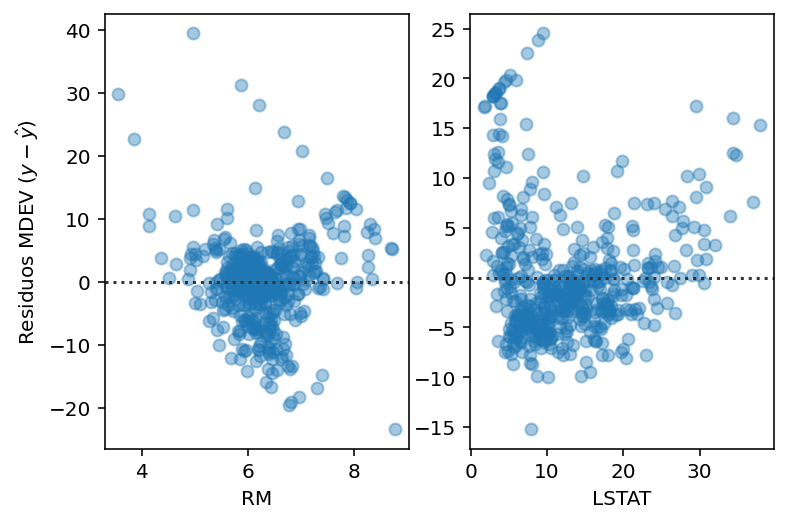

In [21]:
# plot residuales

fig, ax = plt.subplots(1,2)
ax[0]= sns.residplot('RM', 'MEDV', df, ax=ax[0], scatter_kws={'alpha':0.4})
ax[0].set_ylabel('Residuos MDEV $(y-\hat{y})$')
ax[1]= sns.residplot('LSTAT', 'MEDV', df, ax=ax[1], scatter_kws={'alpha':0.4})
ax[1].set_ylabel('')


Los puntos en el plot residual representan la diferencia entre la muestra (y) y el valor predecido (y’). Cuando los residuales son mayores que cero los valores son subestimados, mientras que si son menores son sobreestimados.

A la hora de evaluar la calidad de los modelos este proceso va a ser necesario repetir este proceso, por lo que creamos una función que permita repetir el proceso de una forma rápida. 

In [22]:
def get_mse(df, feature, target='MEDV'):
    y= df[target].values
    x= df[feature].values.reshape(-1,1)
    print('{}~{}'.format(target, feature))
    
    #construcción  y ajuste del modelo
    lm = LinearRegression()
    lm.fit(x,y)
    msg = 'model: y = {:.3f} + {:.3f}x'\
            .format(lm.intercept_, lm.coef_[0])
    print(msg)
    
    #Predict and determine MSE
    y_pred = lm.predict(x)
    error= mean_squared_error(y,y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [23]:
get_mse(df, 'LSTAT')

get_mse(df,'RM')

MEDV~LSTAT
model: y = 34.554 + -0.950x
mse = 38.48

MEDV~RM
model: y = -34.671 + 9.102x
mse = 43.60



Si comparamos los errores  notamos que el error es ligeramente inferior para LSTAT. 

## Splitting into Training and Testing Set

Training Feature Shape: (400, 6)
Testing Feature Shape: (106, 6)
Training Target Shape: (400,)
Testing Target Shape: (106,)


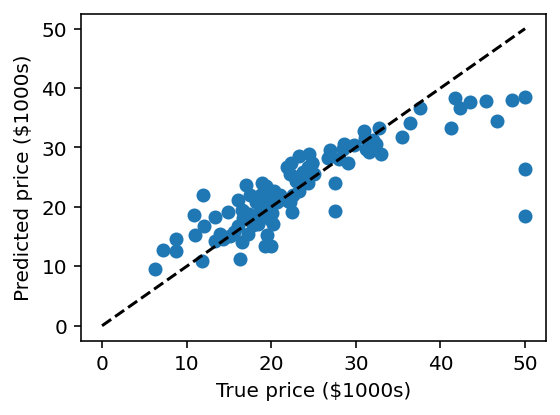

In [24]:
df_objetivo = df['MEDV']


df_variables =  df.copy()
for col in ['MEDV']:
    del df_variables[col]

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_variables)
df_variables = pd.DataFrame(scaled_df, columns=['INDUS','NOX','RM' , 'TAX','PTRATIO','LSTAT'])
    

X, y = df_variables, df_objetivo

# Traing-Test Split: 400 points for training, 106 for testing via train size parameter
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    train_size = 400, 
                                                    random_state=4)

# Print the new shapes of our dataframes
print (f'Training Feature Shape: {X_train.shape}')
print (f'Testing Feature Shape: {X_test.shape}')
print (f'Training Target Shape: {y_train.shape}')
print (f'Testing Target Shape: {y_test.shape}')

clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [25]:
clf.score(X, y)

0.6795175703392582

La funcion no se ajusta muy bien para valores superiores a 40K$, se puede observar que a mayor valor la predicción no suele acertar. El score del modelo es de 68%.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=5, random_state=1)
regr.fit(X_train, y_train)
RandomForestRegressor(...)
predicted = regr.predict(X_test)
expected = y_test

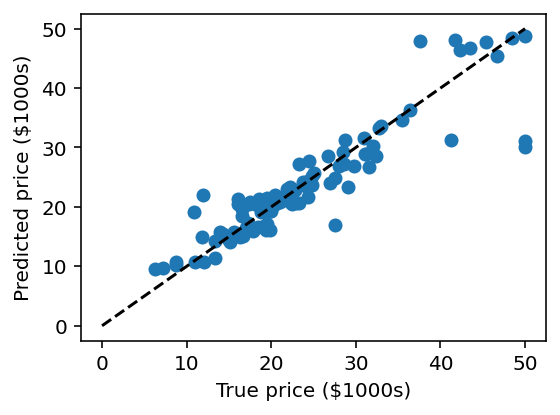

In [27]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [28]:
regr.score(X, y)

0.9008691470098205

Con Random forest mejoramos significativamente la estimación de la regresión, hasta obtener un 90% en el score del modelo.